In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Encoding Target variable

In [5]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
dict = {
    'setosa': 1,
    'versicolor': 2,
    'virginica': 3
}
data['species'] = data['species'].map(dict)

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Feature scaling

In [8]:
for column in data.columns[:-1]:
  data[column] = ( data[column]-min(data[column]) ) / ( max(data[column])-min(data[column]) )

In [9]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


## Splitting independent & dependent features

In [10]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [11]:
X[:20]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [12]:
# Y

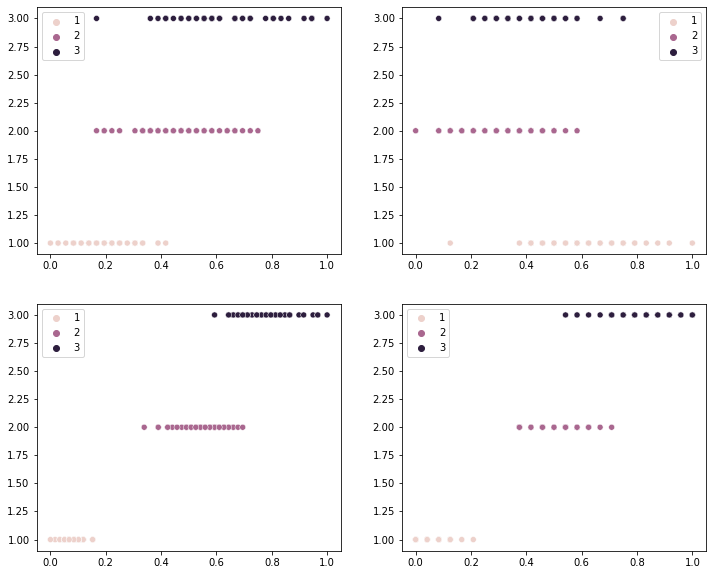

In [13]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.scatterplot(X[:, 0], Y, hue=Y)

plt.subplot(2,2,2)
sns.scatterplot(X[:, 1], Y, hue=Y)

plt.subplot(2,2,3)
sns.scatterplot(X[:, 2], Y, hue=Y)

plt.subplot(2,2,4)
sns.scatterplot(X[:, 3], Y, hue=Y)
plt.show()

## Knn Classification Model

### Find optimum value of k using cost plot

In [14]:
def knn_classification_model(dataidx, X, k):
  temp = X[dataidx] - X
  temp = temp**2
  temp = np.sum(temp, axis=1)**(1/2)
  idx = np.argpartition(temp, k)
  k_min_idx = Y[idx[1:k+1]]
  k_min_idx = pd.Series(k_min_idx)
  res = k_min_idx.value_counts().index[0]
  
  return res

In [15]:
def find_cost(y_pred, Y):
  t = np.sum((y_pred - Y)**2)/len(Y)
  return t

In [17]:
cost = np.zeros(20)

for k in range(1, 20):
  y_pred = []
  for i in range(len(data)):
    y_pred.append(knn_classification_model(i, X, k))
  cost[k] = find_cost(y_pred, Y)

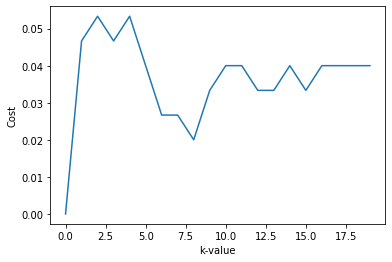

In [23]:
sns.lineplot(np.arange(20), cost)
plt.xlabel('k-value')
plt.ylabel('Cost')
plt.show()

#### Optimum value for k is 8

In [24]:
def knn_classification_model(dataidx, X, k):
  temp = X[dataidx] - X
  temp = temp**2
  temp = np.sum(temp, axis=1)**(1/2)
  idx = np.argpartition(temp, k)
  k_min_idx = Y[idx[1:k+1]]
  k_min_idx = pd.Series(k_min_idx)
  res = k_min_idx.value_counts().index[0]
  
  return res

In [30]:
y_pred = []

for i in range(len(data)):
  y_pred.append(knn_classification_model(i, X, 8))

In [31]:
dict_back = {
    1: 'setosa',
    2: 'versicolor',
    3: 'virginica'
}

In [32]:
y_pred = pd.Series(y_pred).map(dict_back)
y_pred

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: object

In [33]:
y_pred.value_counts()

virginica     51
setosa        50
versicolor    49
dtype: int64

In [34]:
Y_label = data['species'].map(dict_back)
Y_label

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [35]:
Y_label.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Accuracy

In [36]:
accuracy = len(data.loc[y_pred==Y_label])/len(data)*100
accuracy

98.0

### Accuracy of the model is 98%

## Regression

In [35]:
# def knn_reg_model(dataidx, X):
#   temp = X[dataidx] - X
#   temp = temp**2
#   temp = np.sum(temp, axis=1)**(1/2)
#   idx = np.argpartition(temp, k)
#   k_min_idx = Y[idx[1:k+1]]
#   k_min_idx = pd.Series(k_min_idx)
#   res = np.mean(k_min_idx)
  
#   return res

In [38]:
# y_reg_pred = []
# for i in range(len(data)):
#   y_reg_pred.append(knn_reg_model(i, X))
# print(y_reg_pred)